# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


## Observable Trends

-------

1. The temperature and humidity in the southern hemisphere was higher than in the northern hemisphere according to the city latitude as show in Latitude vs Temperature plot and Latitude vs Humidity plot chart. This is due to the southern hemispheres consists of areas with tropical weather.

2. Regions near the equator have by low wind speed and mid-latitudes experience much faster airflow and windspeed. This is because warm equatorial air rises higher into the atmosphere and migrates toward the poles. Cooler and denser air moves over Earth's surface toward the Equator to replace the heated air.

3. There seems to be no strong correlation between latitude and cloudiness as show in the chart below. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

641


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
##This is most similar to Day 2 Activity 5
## create an empty list, loop through the cities list from previous cell calling the 
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1


In [4]:
## remember not all cities will be present so be sure to try: except:
##for extra finesse you could break this list down into smaller blocks and run it (optional)
print("Beginning Data Retrieval ")
print("--------------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")



Beginning Data Retrieval 
--------------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : portland
Processing Record 3 of Set 1 : chokurdakh
Processing Record 4 of Set 1 : college
Processing Record 5 of Set 1 : nouakchott
Processing Record 6 of Set 1 : belaya gora
Processing Record 7 of Set 1 : namibe
Processing Record 8 of Set 1 : lebu
Processing Record 9 of Set 1 : ukiah
Processing Record 10 of Set 1 : katherine
Processing Record 11 of Set 1 : atuona
Processing Record 12 of Set 1 : nome
City not found. Skipping...
Processing Record 13 of Set 1 : sakakah
Processing Record 14 of Set 1 : castro
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : kruisfontein
City not found. Skipping...
Processing Record 17 of Set 1 : tiksi
Processing Record 18 of Set 1 : hilo
Processing Record 19 of Set 1 : aykhal
Processing Record 20 of Set 1 : inhambane
Processing Record 21 of Set 1 : mataura
Processing Record 22 of Set 1 : gwadar
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
##remember the output of the previous cell is an array
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date,
})

In [6]:
# Save city data into a csv file
#  Open the output file
weather_df.to_csv("cities.csv", index=False)

In [7]:
# Display the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,61,40,19.57,CL,1661632214
1,Portland,45.5234,-122.6762,73.58,53,75,6.91,US,1661632434
2,Chokurdakh,70.6333,147.9167,49.03,63,20,6.82,RU,1661632477
3,College,64.8569,-147.8028,56.59,88,100,0.00,US,1661632478
4,Nouakchott,18.0858,-15.9785,82.33,81,5,13.42,MR,1661632478
...,...,...,...,...,...,...,...,...,...
587,Coquimbo,-29.9533,-71.3436,58.73,77,20,10.36,CL,1661632761
588,Sokoto,13.0609,5.2390,75.72,83,73,8.93,NG,1661632762
589,Kandi,11.1342,2.9386,72.68,92,100,5.95,BJ,1661632763
590,Hamada,34.8833,132.0833,69.24,81,73,9.80,JP,1661632763


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
##use loc to filter
#  Get the indices of cities that have humidity over 100%.
## it's the same loc with .index appended to the end, save this to dataframe for next cell


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
## syntax for this:
########  variable=dataframe.drop(data_to_drop, inplace="False")


In [10]:
## create a series for each column to be used in the charts
## one for each of these: lat, max temp, humidity, cloudiness, wind speed
## output the data to csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

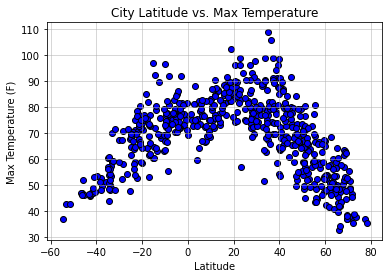

In [11]:
##matplotlib day 1 activities 11&12
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot

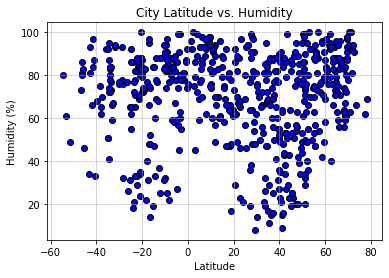

In [12]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

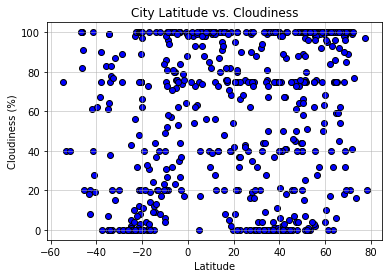

In [13]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "blue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

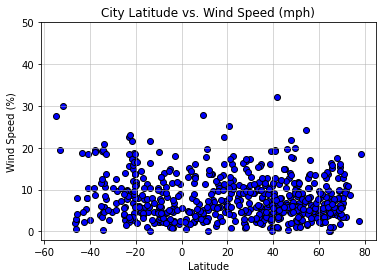

In [14]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [15]:
##create a linear regression function if possible
## use the code from MatPlotLib day 3 activity 8
## from the linregress call to plt.show() can be ran as a single function
## passing in the x_values, y_values, title and where you want the formula to show up
## remember to put a little comment about the charts as you go.

northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7094238586352372


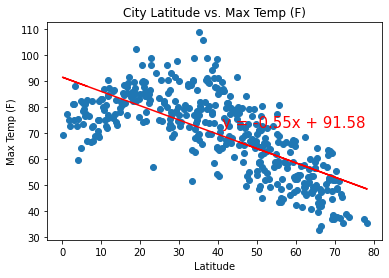

None


<Figure size 432x288 with 0 Axes>

In [29]:
## filter your main dataframe where LAT>0 for Northern, LAT<0 for Southern hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.title("City Latitude vs. Max Temp (F)")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (F)")
    print(f"The r-squared is: {rvalue}")
    plt.show()

print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7982159375606536


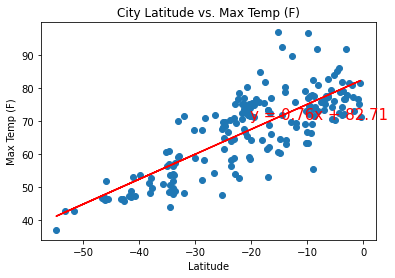

None


<Figure size 432x288 with 0 Axes>

In [32]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

plt.title("City Latitude vs. Max Temp (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04273364833785998


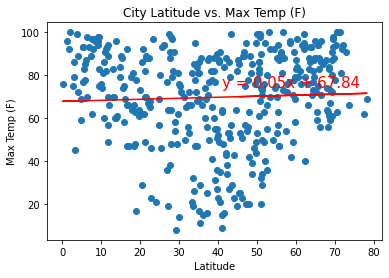

None


<Figure size 432x288 with 0 Axes>

In [47]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.056178803850697547


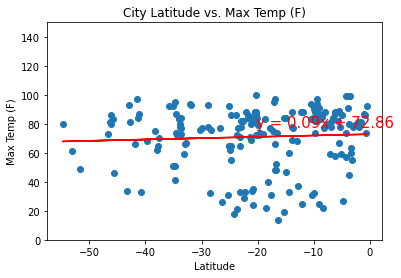

None


<Figure size 432x288 with 0 Axes>

In [34]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.ylim(0, y_values.max()+50)
plt.ylabel("Humidity (%)")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06148936343142501


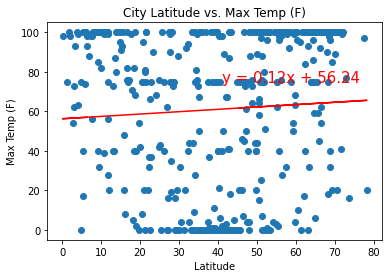

None


<Figure size 432x288 with 0 Axes>

In [35]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16559573881344292


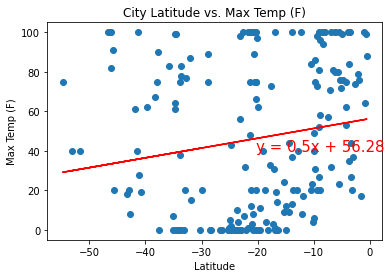

None


<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.030263004802705402


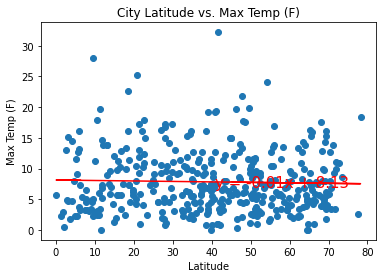

None


<Figure size 432x288 with 0 Axes>

In [37]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24581305233462536


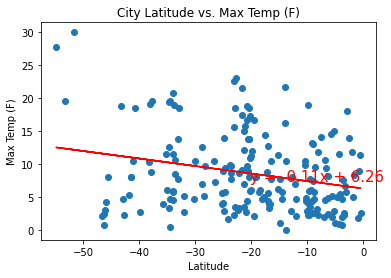

None


<Figure size 432x288 with 0 Axes>

In [38]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")